# Objective:  
### Perform an efficient classification of malicious activities using ML techniques.




# CRISP-DM Process:

## 1) Business understanding:

Business need to analyze the incoming traffic and classify each request as a valid request or an attack / malicious activity on the network. 
There are different types of attacks like 'DoS','Probe','Privilege' and 'Access' types.

Exploratory Data Analysis will be done by using Pandas profiling module, on the training and test data to understand the data involved. 

Apply Feature Engineering techniques: like 1) One-hot encoding  and 2) Min-Max normalization techniques on features to convert the numerical values.

Selected ML models to use  ”Logistic Regression” and “Decision Tree” algorithms from “sklearn” library’. 

Evaluation will be done by calculating the F1-score, recall, precision and accuracy scores on both the Logistic Regression and Decision Tree models.

Accuracy score should be more than 65% to accept the model.



# 2) Data Understanding:


### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data set

In [2]:
# Using KDDTrain+.txt as the train data.
train_data = pd.read_csv('KDDTrain+.txt')

In [3]:
#Assigning column names for training set
train_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'level']
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# Using KDDTest+.txt as the train data.
test_data = pd.read_csv('KDDTest+.txt')

In [5]:
#Assigning column names for training set
test_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'level']
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


### Exploratory Data Analysis

#### Using Pandas Profiling

In [7]:
train_data_profile = ProfileReport(train_data, minimal=True)
train_data_profile.to_file(output_file='train_data_profile_output.html')

In [8]:
test_data_profile = ProfileReport(test_data, minimal=True)
test_data_profile.to_file(output_file='test_data_profile_output.html')

In [9]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
train_data.shape

(125972, 43)

In [11]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
test_data.shape

(22543, 43)

# 3) Data Preparation:

### Data Wrangling / Pre-processing

In [13]:
# Dropping 'level' columns from the train and test data set.
train_data = train_data.drop('level', 1)
test_data = test_data.drop('level', 1)

In [14]:
# Mapping normal to 0, all attacks to 1 on the 'attack' column of both Train and Test data set
train_data_attack = train_data.attack.map(lambda a: 0 if a == 'normal' else 1)
test_data_attack = test_data.attack.map(lambda a: 0 if a == 'normal' else 1)

train_data['attack_flag'] = train_data_attack
test_data['attack_flag'] = test_data_attack

train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,1


In [15]:
np.shape(train_data)

(125972, 43)

In [16]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [18]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,0
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,0
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,1
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,0


# Classification and mapping of attacks feature

In [19]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type


# map the data and join to the data set
attack_map = train_data.attack.apply(map_attack)
train_data['attack_map'] = attack_map

test_attack_map = test_data.attack.apply(map_attack)
test_data['attack_map'] = test_attack_map

# view the result
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,1,1


In [20]:
# use a crosstab to get attack vs protocol. Most of the attacks are related to the tcp protocol
attack_vs_protocol = pd.crosstab(train_data.attack, train_data.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [21]:
set(train_data['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [22]:
set(train_data['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [23]:
set(train_data['service'])

{'IRC',
 'X11',
 'Z39_50',
 'aol',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'harvest',
 'hostnames',
 'http',
 'http_2784',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [24]:
set(train_data['attack_map'])

{0, 1, 2, 3, 4}

### Checking for NULL values in Train and test data

In [25]:
check_for_null = train_data[train_data.isna().any(axis=1)]
print(check_for_null)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, attack_flag, attack_map]
Index: []

[0 rows x 44 columns]


In [26]:
train_data.isnull().values.any()

False

In [27]:
test_data.isnull().values.any()

False

In [28]:
train_data[['protocol_type', 'service', 'flag']].describe()

,protocol_type,service,flag
count,125972,125972,125972
unique,3,70,11
top,tcp,http,SF
freq,102688,40338,74944


### Feature Engineering techniques

### One-hot encoding

In [29]:
column_list = ['protocol_type','service','flag']

In [30]:
## One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [31]:
# Merging train data and test data
combined_data = pd.concat([train_data,test_data])

In [32]:
# Applying one-hot encoding on the combined data set
combined_data = one_hot(combined_data,column_list)

In [33]:
combined_data.shape

(148515, 125)

In [34]:
train_data_new = combined_data.iloc[:125973]
test_data_new = combined_data.iloc[125973:]

In [35]:
train_data_new.shape

(125973, 125)

In [36]:
test_data_new.shape

(22542, 125)

In [37]:
train_data_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125969,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125971,0,151,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
test_data_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22539,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22541,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Applying Min-Max Normalization

In [39]:
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [40]:
# Droping "attack" columns to create the Tarin data set
train_tmp = train_data_new.pop('attack')

In [41]:
train_data_new.shape

(125973, 124)

In [42]:
# Droping "attack" columns to create the test data set
test_tmp = test_data_new.pop('attack')

In [43]:
test_data_new.shape

(22542, 124)

In [44]:
# Invoking Normalization on the "training" Data Set
train_data_new = normalize(train_data_new,train_data_new.columns)

In [45]:
# Invoking Normalization on the "test" Data Set
test_data_new = normalize(test_data_new,test_data_new.columns)

In [46]:
#Fixing labels for "training" data set
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in train_tmp:
    if item in check1:
        classlist.append("DoS")
    elif item in check2:
        classlist.append("Probe")
    elif item in check3:
        classlist.append("U2R")
    elif item in check4:
        classlist.append("R2L")
    else:
        classlist.append("Normal")

In [47]:
#Appending Class column to "Training" set
train_data_new["Class"] = classlist

In [48]:
train_data_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
2,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
3,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
125969,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
125970,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
125971,0.000000,1.094232e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal


In [49]:
#Fixing labels for "testing" data set
testclasslist = []
testcheck1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
testcheck2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
testcheck3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
testcheck4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for testitem in test_tmp:
    if testitem in testcheck1:
        testclasslist.append("DoS")
    elif testitem in testcheck2:
        testclasslist.append("Probe")
    elif testitem in testcheck3:
        testclasslist.append("U2R")
    elif testitem in testcheck4:
        testclasslist.append("R2L")
    else:
        testclasslist.append("Normal")

In [50]:
#Appending Class column to testing set
test_data_new["Class"] = testclasslist

In [51]:
train_data_new["Class"] = train_data_new["Class"].astype('category')
train_data_new.dtypes

duration           float64
src_bytes          float64
dst_bytes          float64
land               float64
wrong_fragment     float64
                    ...   
flag_S2            float64
flag_S3            float64
flag_SF            float64
flag_SH            float64
Class             category
Length: 125, dtype: object

### Plotting top 10 features

### Applying encoding to the "Class" feature on Train data

In [52]:
train_data_new_plot = train_data_new.copy()
train_data_new_plot["Class_cat"] = train_data_new_plot["Class"].cat.codes
train_data_new_plot.drop(columns = "Class", inplace=True)
train_data_new_plot.head()
# train_data_new["Class_cat"] = train_data_new["Class"].cat.codes
# train_data_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class_cat
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Finding top 10 Features using Pearson Correlation with target value greater than 0.44

In [53]:
#Using Pearson Correlation
plt.figure(figsize=(60,50))
cor = train_data_new_plot.corr()

<Figure size 4320x3600 with 0 Axes>

In [54]:
train_data_new_plot

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class_cat
0,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
125969,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
125970,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
125971,0.000000,1.094232e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [55]:
cor

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class_cat
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.005336,0.034268,0.539954,-0.068182,-0.005943,-0.003411,0.001148,-0.068253,-0.005119,0.161694
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,0.007609,0.178046,-0.000685,-0.004800,0.000007,-0.000229,0.000682,-0.006079,-0.000360,0.013482
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.000537,-0.000141,0.029685,-0.003042,0.000147,0.000215,-0.000077,-0.004509,-0.000228,0.008763
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.001579,-0.000403,-0.001972,0.022781,-0.000759,-0.000448,-0.000278,-0.017074,-0.000654,-0.010021
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.010027,-0.002560,-0.012526,-0.055342,-0.004824,-0.002843,-0.001765,0.073841,-0.004155,-0.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
flag_S2,-0.003411,-0.000229,0.000215,-0.000448,-0.002843,-0.000246,0.008963,-0.000858,0.033628,-0.000360,...,-0.003560,-0.000909,-0.004447,-0.019646,-0.001712,1.000000,-0.000627,-0.038498,-0.001475,0.012010
flag_S3,0.001148,0.000682,-0.000077,-0.000278,-0.001765,-0.000153,-0.000190,0.017265,0.019436,-0.000129,...,-0.002210,-0.000564,-0.002761,-0.012199,-0.001063,-0.000627,1.000000,-0.023906,-0.000916,0.012006
flag_SF,-0.068253,-0.006079,-0.004509,-0.017074,0.073841,0.006383,0.074926,0.000137,0.641749,0.007291,...,-0.135791,-0.034667,-0.169642,-0.749473,-0.065328,-0.038498,-0.023906,1.000000,-0.056270,0.556624
flag_SH,-0.005119,-0.000360,-0.000228,-0.000654,-0.004155,-0.000359,-0.004255,-0.001255,-0.037575,-0.000542,...,-0.005203,-0.001328,-0.006500,-0.028715,-0.002503,-0.001475,-0.000916,-0.056270,1.000000,0.089661


In [56]:
#Correlation with output variable
cor_target = abs(cor["Class_cat"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.44]
relevant_features

count                          0.485203
serror_rate                    0.670832
srv_serror_rate                0.671683
same_srv_rate                  0.626296
dst_host_same_srv_rate         0.465251
dst_host_same_src_port_rate    0.446733
dst_host_serror_rate           0.672739
dst_host_srv_serror_rate       0.674244
flag_S0                        0.686825
flag_SF                        0.556624
Class_cat                      1.000000
Name: Class_cat, dtype: float64

In [57]:
#Correlation with output variable
cor_target = abs(cor["Class_cat"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.44]
relevant_features

count                          0.485203
serror_rate                    0.670832
srv_serror_rate                0.671683
same_srv_rate                  0.626296
dst_host_same_srv_rate         0.465251
dst_host_same_src_port_rate    0.446733
dst_host_serror_rate           0.672739
dst_host_srv_serror_rate       0.674244
flag_S0                        0.686825
flag_SF                        0.556624
Class_cat                      1.000000
Name: Class_cat, dtype: float64

count


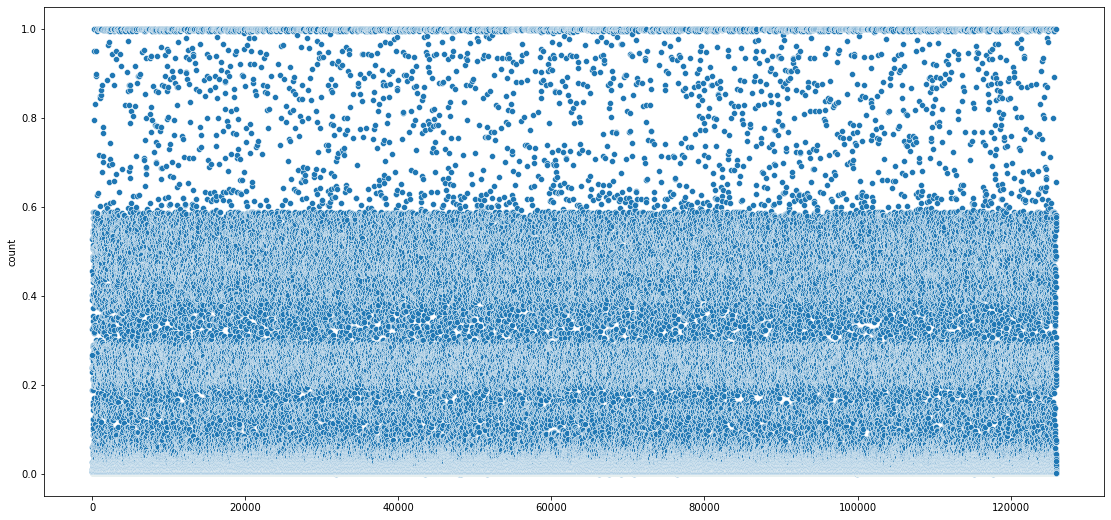

serror_rate


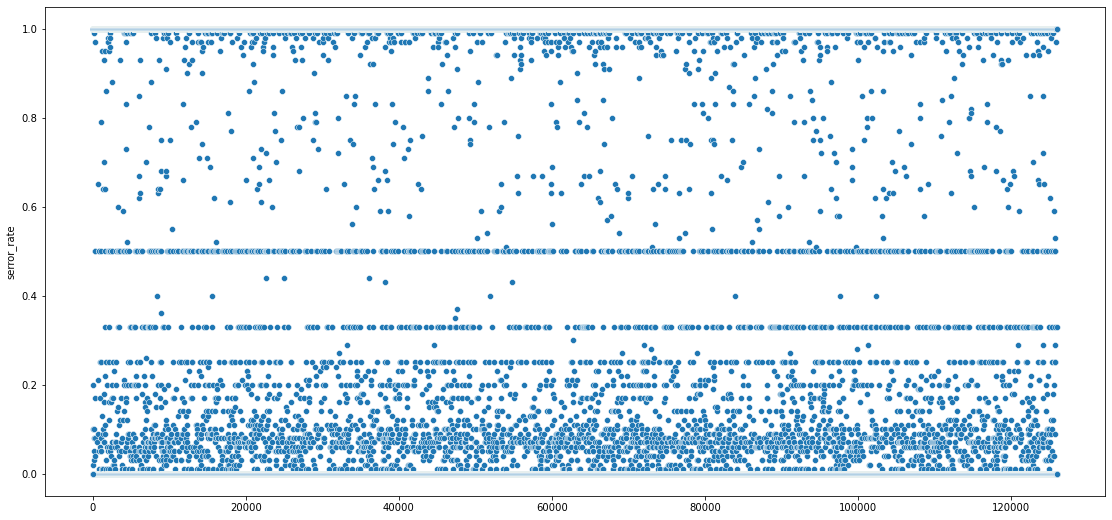

srv_serror_rate


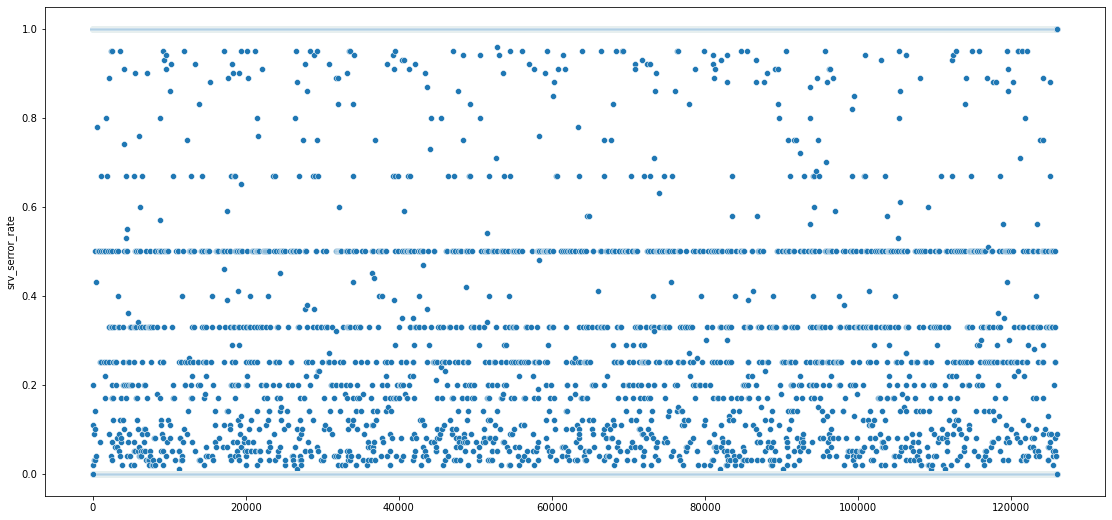

same_srv_rate


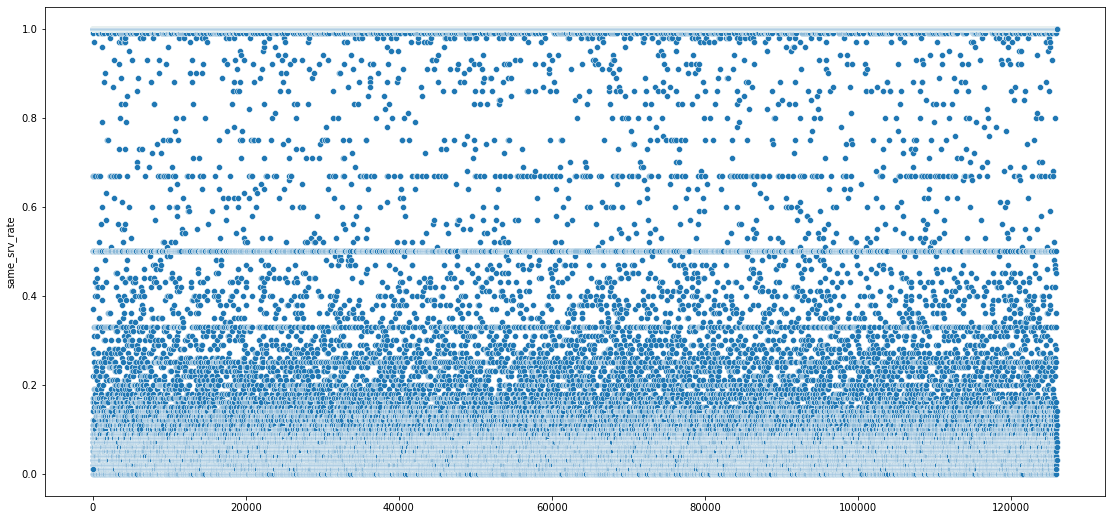

dst_host_same_srv_rate


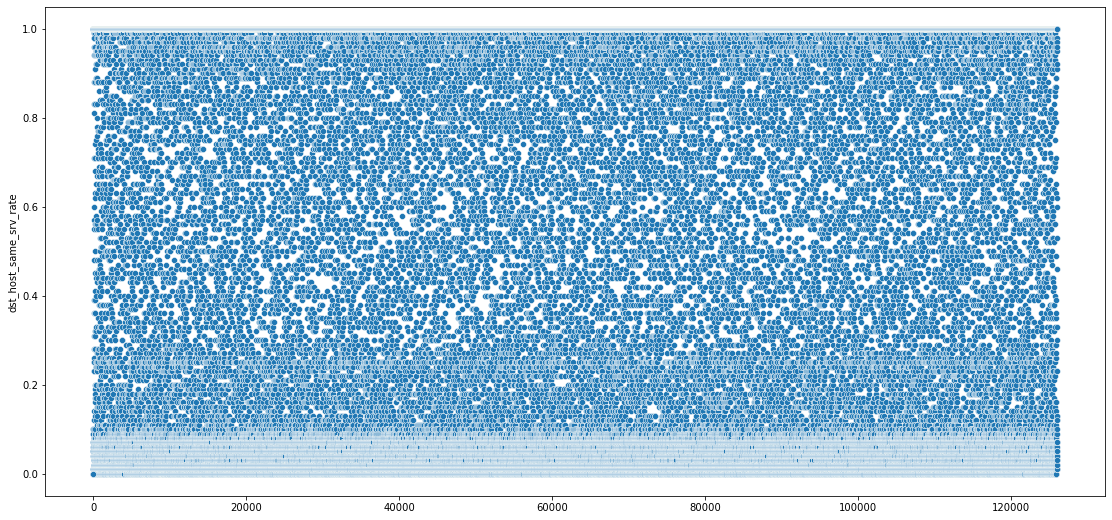

dst_host_same_src_port_rate


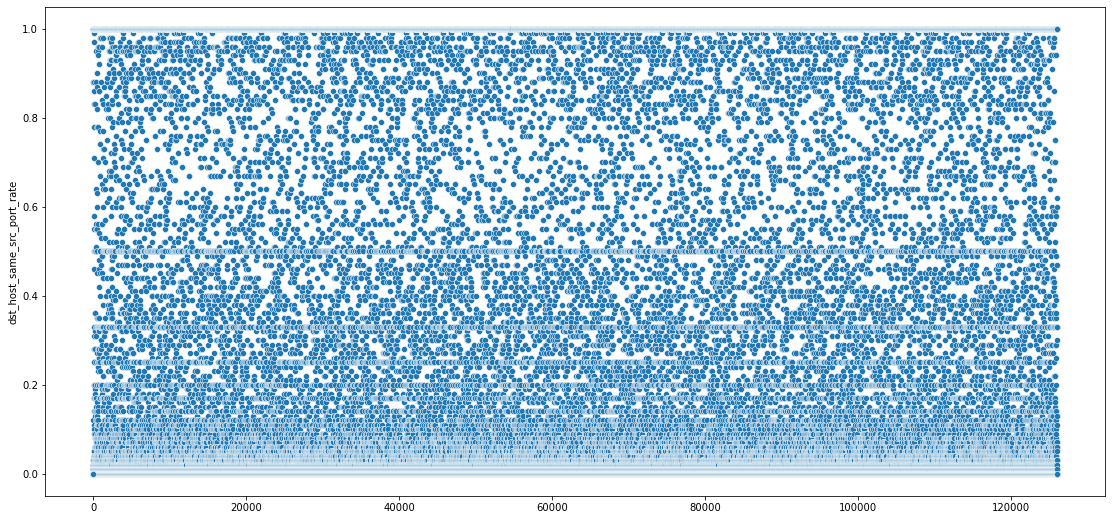

dst_host_serror_rate


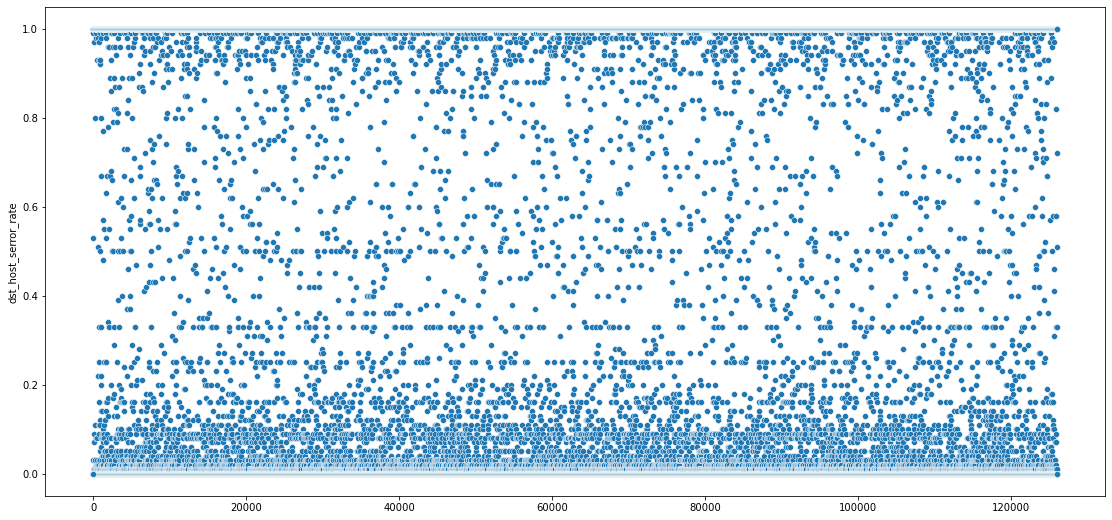

dst_host_srv_serror_rate


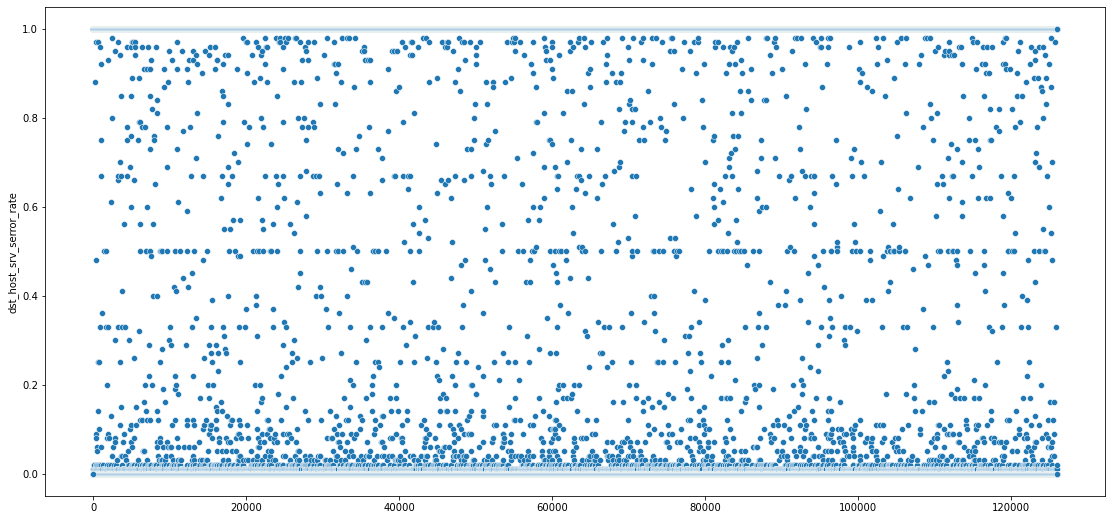

flag_S0


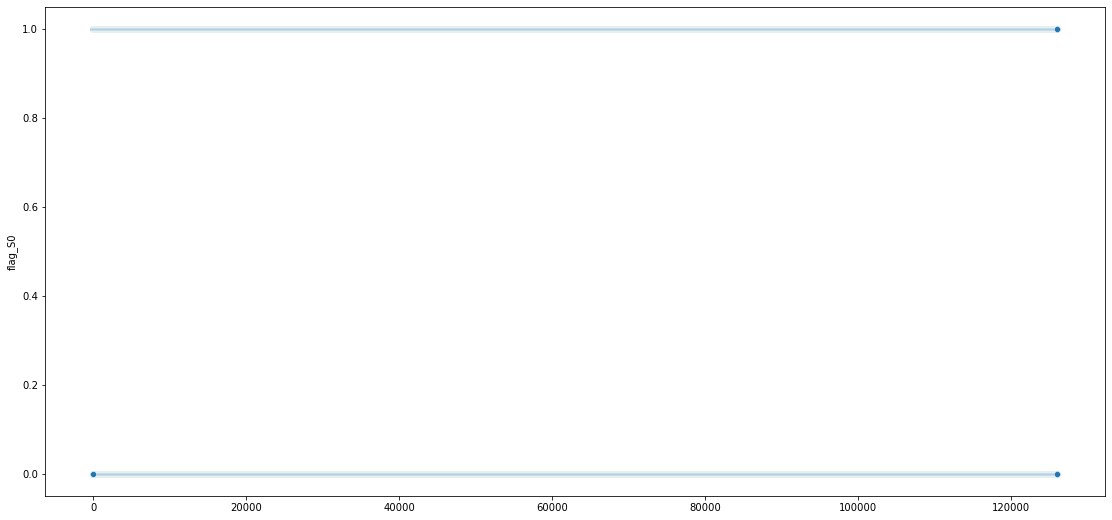

flag_SF


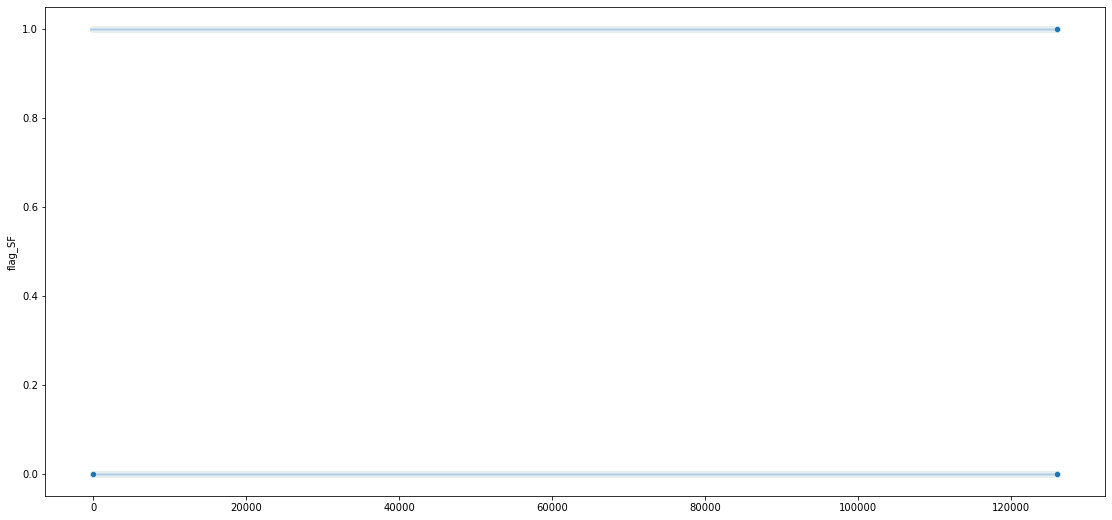

Class_cat


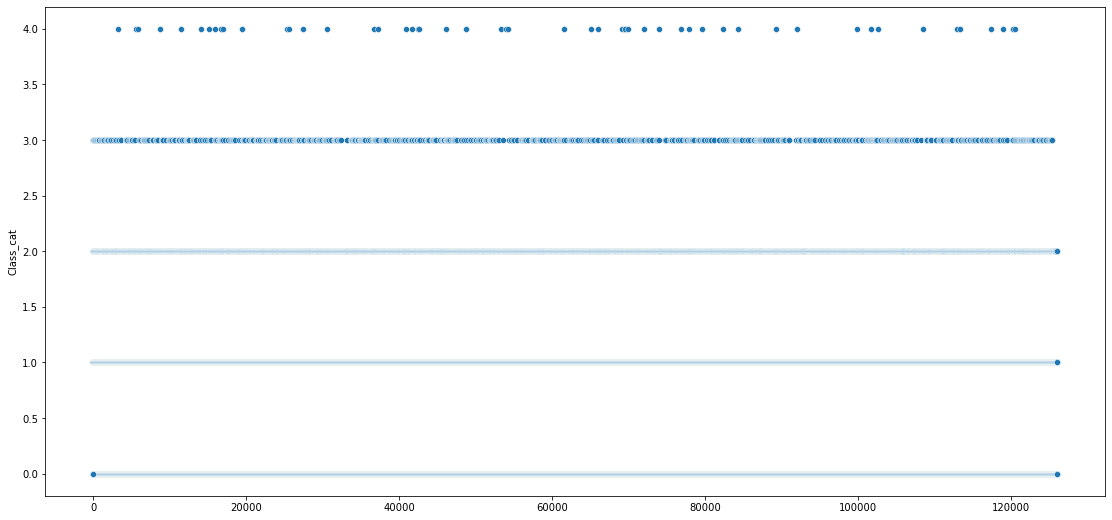

In [58]:
for key, val in relevant_features.iteritems():
    print (key)
    plt.figure(figsize=(19,9))
    sns.scatterplot(data=train_data_new_plot[key])
    plt.show()

### Preparing the Train and test data

In [59]:
#Preparing X_train, Y_train
training_data = train_data_new.values
X_train = training_data[:,:-1]
Y_train = training_data[:,-1]

In [60]:
#Preparing X_test and Y_test
testing_data = test_data_new.values
X_test = testing_data[:,:-1]
Y_test = testing_data[:,-1]

In [61]:
train_data_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS


# 4) Modelling:


## Classification Techniques

### i) Logistic Regression

In [62]:
classifier_logit = LogisticRegression(solver='liblinear', multi_class='auto')

## Fitting the Training data
classifier_logit.fit(X_train, Y_train)

train_acc = classifier_logit.score(X_train, Y_train)
test_acc = classifier_logit.score(X_test, Y_test)

#Predicting for test data
y_pred = classifier_logit.predict(X_test)
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9995713367150103
Testing accuracy is: 0.9425516813060065


In [63]:
#Capturing Performance metrics - "Logistic Regression"
Logistic_f1 = f1_score(Y_test, y_pred, average="macro")
Logistic_precision = precision_score(Y_test, y_pred, average="macro")
Logistic_recall = recall_score(Y_test, y_pred, average="macro")
Logistic_accuracy = accuracy_score(Y_test, y_pred)

### ii) Decision Tree classifier

In [64]:
classifier_DT = DecisionTreeClassifier()

## Fitting the Training data
classifier_DT = classifier_DT.fit(X_train, Y_train)
train_acc = classifier_DT.score(X_train, Y_train) # mean acc on train data
test_acc = classifier_DT.score(X_test, Y_test) # mean acc on test data
y_pred = classifier_DT.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 1.0
Testing accuracy is: 0.9858042764617159


In [65]:
#Capturing Performance Metrics - Decision Tree
Tree_f1 = f1_score(Y_test, y_pred, average="macro")
Tree_precision = precision_score(Y_test, y_pred, average="macro")
Tree_recall = recall_score(Y_test, y_pred, average="macro")
Tree_accuracy = accuracy_score(Y_test, y_pred)

# 5) Evaluation:


## Performance comparison of both the classifiers

In [66]:
perf_data = [["Logistic Regression",Logistic_accuracy,Logistic_precision,Logistic_recall,Logistic_f1],["Decision Tree",Tree_accuracy,Tree_precision,Tree_recall,Tree_f1]]
metric = pd.DataFrame(perf_data,columns = ['','Mean Accuracy','Mean Precision','Mean Recall','Mean F1'])
metric

,,Mean Accuracy,Mean Precision,Mean Recall,Mean F1
0,Logistic Regression,0.942552,0.910542,0.789286,0.825915
1,Decision Tree,0.985804,0.851136,0.985909,0.883542


## Confusion Matrix

In [67]:
class_names = ["Normal","DoS","Probe","U2R","R2L"]

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None,cmap=plt.cm.Blues):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

 
    cm = confusion_matrix(y_true, y_pred)

   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

## Logistic Regression Matrix

Confusion matrix, without normalization
[[7421    0   37    0    0]
 [   0 9711  178    0    0]
 [ 465    0 1956    0    0]
 [ 141    0  429 2134    3]
 [   5    0    4   33   25]]


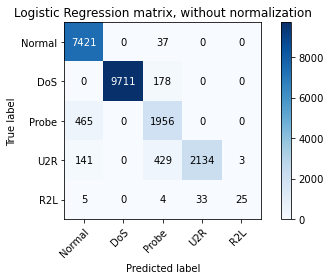

In [69]:
#Logistic Regression Matrix
classifier_LRM = LogisticRegression(solver='liblinear', multi_class='auto')
y_pred = classifier_LRM.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Logistic Regression matrix, without normalization')
plt.show()

##  Decision Tree Matrix

Confusion matrix, without normalization
[[7458    0    0    0    0]
 [   0 9711    0  178    0]
 [   0    0 2421    0    0]
 [   0    0    0 2565  142]
 [   0    0    0    0   67]]


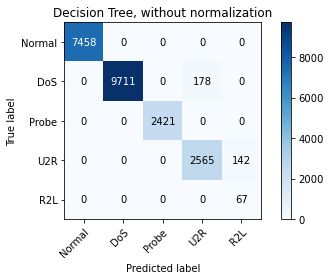

In [70]:
classifier_DTM = DecisionTreeClassifier()
y_pred = classifier_DTM.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Decision Tree, without normalization')
plt.show()